# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
%matplotlib inline

1.  Is the data normal?

To evaluate normality, I did a histogram of the temperatures.  While the visual isn't a perfect test, it should be good enough for our purposes.  I also did a normality check from scipy.stats to check.

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


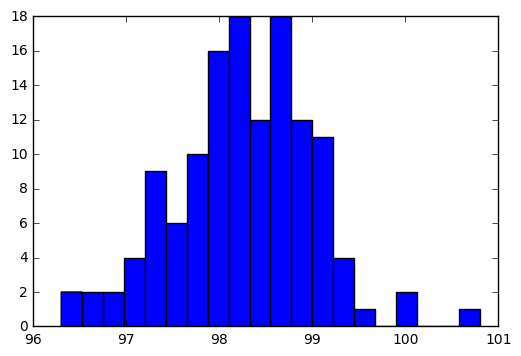

In [14]:
fig, ax = plt.subplots()
ax.hist(df['temperature'],bins=20)
print(sp.normaltest(df['temperature']))

Reasonably normal-shaped.  The Chi-square statistic of 2.7 is not great, but as the problem mentions, the CLT says it shouldn't matter for this sample size.

Is the sample size large?  Are the observations independent?

The subjects were selected at random from the general public, and appear to be independent.

Checking the sample size:

In [9]:
print(len(df))

130


130 observations would normally be considered a "large" sample (generally > 20)

To evaluate a null hypothesis that the true population mean is 98.6, we'll use a one-sample z-statistic test, since the sample is large and we are comparing the sample mean to a known statistic, rather than comparing two samples to each other. For the following, I'll calculate the mean, var, and SD using base Python and then compare to the results from scipy.stats:

In [38]:
tempmean=np.mean(df['temperature'])
print("mean: "+str(tempmean))
tempvar=np.var(df['temperature'])
print("variance: "+str(tempvar))
tempsd=np.std(df['temperature'])
print("Std Deviation: "+str(tempsd))
zscore=(98.6-tempmean)/(tempsd/(130**0.5))
print("Z-score: "+ str(zscore))
print("P-value: "+str(sp.norm.sf(abs(zscore))*2))

mean: 98.24923076923078
variance: 0.5334224852071
Std Deviation: 0.7303577789050377
Z-score: 5.475925202078116
P-value: 4.35231516588e-08


Clearly, it is very unlikely that 98.6 is the population mean based on this sample, and we would reject that as a null hypothesis.  Now, doing the same thing as a t-test:

In [39]:
print(sp.ttest_1samp(df['temperature'],98.6))

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


The t-test yields very much the same result.

To say what would be considered an "abnormal" normal temperature, I would define a 95% confidence interval.

In [40]:
print("Top of 95% CI: "+str(tempmean+(1.96*(tempsd/(130**0.5)))))
print("Bottom of 95% CI: "+str(tempmean-(1.96*(tempsd/(130**0.5)))))
print("SciPy.stats 95% CI: "+str(sp.norm.interval(0.95, loc=tempmean, scale=tempsd/(130**0.5))))


Top of 95% CI: 98.37478173403336
Bottom of 95% CI: 98.12367980442819
SciPy.stats 95% CI: (98.123682111456645, 98.37477942700491)


To consider whether males and females have a signficant difference in body temperature, we will do a 2-sample t-test.

In [48]:
df.head()
samplea=df[df['gender']=='M']
sampleb=df[df['gender']=='F']
sp.ttest_ind(a=samplea['temperature'],
            b=sampleb['temperature'],
            equal_var=True)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

Based on the results of the 2-sample t-test, we conclude that, with a more than 97% confidence, there is a difference in mean body temperature between men and women.